# Taller 1 Procesamiento de imagenes y visión
Autor : **Daniel Eduardo Ovalle Rosas**

*Descripción paso a paso*
1. Se cargarón las librerias de OpenCV y numpy para procesamiento de imagenes en python y manipular arreglos o matrices.
2. Cambio en el espacio de Color de la imagen de las pelotas lisas, con el objetivo de realizar segmentacion de color en el 
espacio HSV y en escala de grises para quitarlas del fondo.


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_original = cv.imread("PELOTASLISAS-COLORES.jpg")
#Cambio en los espacios de color (trabajare con escala de grises y HSV)
imgRGB =  cv.cvtColor(img_original,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_original,cv.COLOR_BGR2GRAY)
hsv_image = cv.cvtColor(img_original,cv.COLOR_BGR2HSV)

3. En esta sección quite las pelotas de la imagen con el objetivo de quedarme con solo la mascara binaria.
Para esto realicé un proceso de umbralización, donde tome la imagen de las pelotas en escala de grises y le defini un umbral para dejar solo el fondo blanco. el resto toma un valor de 0.

Adicionalmente la convertí en una imagen de 3 canales. Esto para posteriormente poder realizar operaciones con las otras imagenes.

In [11]:
#Imagen sin pelotas 
ret, img_sbolas= cv.threshold(img_gray,243,255,cv.THRESH_BINARY)
mascara_img = np.ones_like(img_original)*255  #Creo un fondo blanco de 3 canales con el objetivo de aplicar la mascara al fondo
Sin_pelotas = cv.bitwise_and(mascara_img, mascara_img, mask=img_sbolas)   #Imagen sin pelotas de 3 canales. Para poder operarla
cv.imshow("Imagen sin pelotas",Sin_pelotas)
dimension_Mascara =   Sin_pelotas.shape
print("Dimensiones mascara",dimension_Mascara)

cv.waitKey(0)
cv.destroyAllWindows()

Dimensiones mascara (624, 464, 3)


Inicie con la segmentación por colores de la imagen. La idea es agregar una pelota una por una hasta completar 4.

Para esto tuve en cuenta el espacio de colores HSV, donde me base en la imagen "Espacio de Color HSV" encontrada en la carpeta.
Donde el valor de Hue en openCV toma valores de 0-180 , la saturación de 0-255 y value de 0-255.

A partir de esta imagen tome como criterio los valores de H,S,V correspondientes a cada color para tenerlos encuenta en mi umbral para obtener una mascara donde solo separe de la imagen la pelota con el color deseado.

Con la mascara de la imagen con el color deseado. Aplique un "and" entre las 2 imagenes para obtener una imagen con la pelota
que deseo separar.

Una vez con esto sumo la imagen donde esta la pelota separada con la mascara calculada en el inicio "la cual no tiene pelotas" y donde estaban las pelotas tiene un valor de 0, de este modo ese espacio se rellena con la pelota que deseo incluir en la imagen.

Text(0.5, 1.0, 'Espacio de Color HSV')

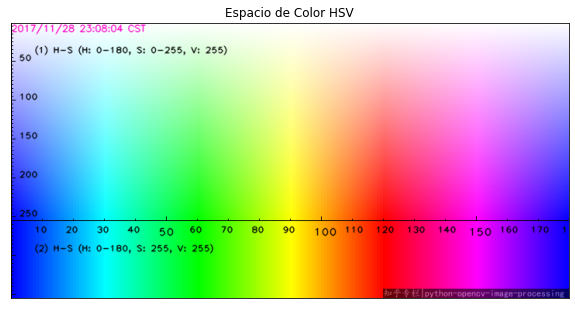

In [13]:
Espacio_color_HSV = cv.imread("Espacio de Color HSV.png") #A partir de esta imagen definí los umbrales para H,S,V

plt.figure(figsize=(10, 20))
plt.imshow(Espacio_color_HSV)
plt.xticks([])
plt.yticks([])

plt.title('Espacio de Color HSV')


In [6]:
#Segmentación del color Naranja
orange_low = np.array([5, 60, 25]) 
orange_up = np.array([25, 255, 255])

orange_mask = cv.inRange(hsv_image,orange_low,orange_up)

Naranjita =  cv.bitwise_and(img_original, img_original, mask= orange_mask)
dimension_Naranjita = Naranjita.shape

cv.imshow("BOLA NARANJA", Naranjita)
print("Dimensiones naranjita",dimension_Naranjita)

Resultado = cv.add(Naranjita,Sin_pelotas)
cv.imshow("Una Bola",Resultado)
cv.waitKey(0)
cv.destroyAllWindows()

Dimensiones naranjita (624, 464, 3)


In [7]:
#Segmentación del Color Rojo tiene 2 umbrales
red_low =  np.array([0,60,25])
red_up = np.array([5,255,255])
red_low1 =  np.array([160,60,25])
red_up1 = np.array([180,255,255])

red_mask1 = cv.inRange(hsv_image,red_low,red_up)
red_mask2 = cv.inRange(hsv_image,red_low1,red_up1)

Rojo1 =  cv.bitwise_and(img_original, img_original, mask= red_mask1)
Rojo2 =  cv.bitwise_and(img_original, img_original, mask= red_mask2)
Rojo = cv.add(Rojo1,Rojo2)

cv.imshow("Rojo1",Rojo1)
cv.imshow("Rojo2",Rojo2)
cv.imshow("ROJO BUENARDO",Rojo)

Resultado = cv.add(Rojo,Resultado)
cv.imshow("Dos Bolas",Resultado)

cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
#Segmentación del Color Azul
blue_low =  np.array([92,60,25])
blue_up = np.array([135,255,255])

blue_mask = cv.inRange(hsv_image,blue_low,blue_up)
Azul =  cv.bitwise_and(img_original, img_original, mask= blue_mask)
cv.imshow("Azul",Azul)

Resultado = cv.add(Azul,Resultado)
cv.imshow("Tres Bolas",Resultado)

cv.waitKey(0)
cv.destroyAllWindows()

In [9]:

#Segmentación del Color Amarillo
yellow_low =  np.array([25,60,25])
yellow_up = np.array([35,255,255])

yellow_mask = cv.inRange(hsv_image,yellow_low,yellow_up)
Amarillo =  cv.bitwise_and(img_original, img_original, mask= yellow_mask)
cv.imshow("Negro",Amarillo)

Resultado = cv.add(Amarillo,Resultado)
cv.imshow("Cuatro Bolas",Resultado)

cv.waitKey(0)
cv.destroyAllWindows()

#Resultados Obtenidos

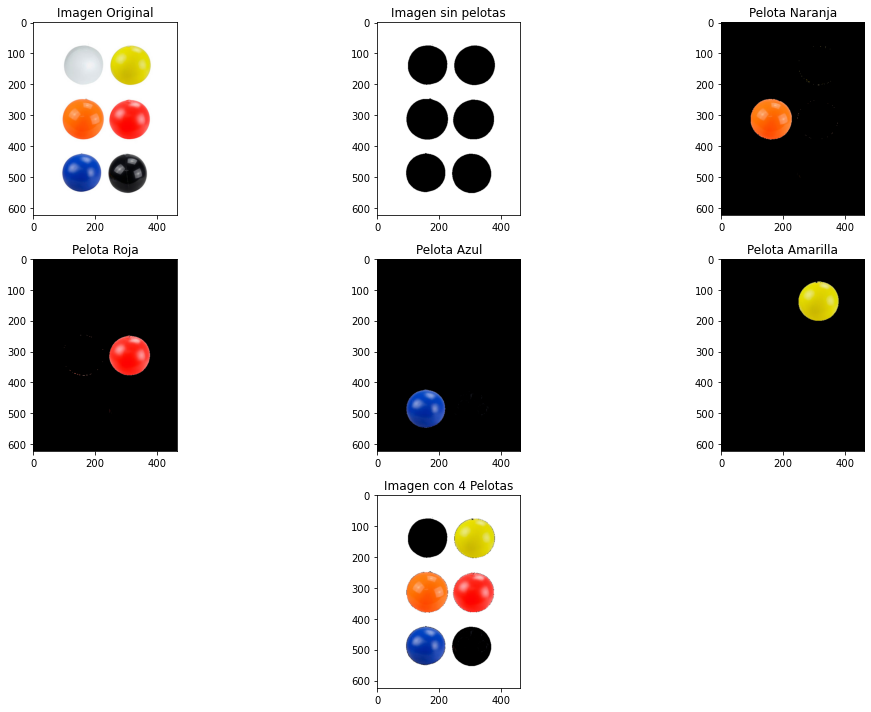

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(331)
plt.imshow(cv.cvtColor(img_original,cv.COLOR_RGB2BGR))
plt.title('Imagen Original')

plt.subplot(332)
plt.imshow(cv.cvtColor(Sin_pelotas,cv.COLOR_RGB2BGR))
plt.title('Imagen sin pelotas')

plt.subplot(333)
plt.imshow(cv.cvtColor(Naranjita,cv.COLOR_RGB2BGR))
plt.title('Pelota Naranja')

plt.subplot(334)
plt.imshow(cv.cvtColor(Rojo,cv.COLOR_RGB2BGR))
plt.title('Pelota Roja')

plt.subplot(335)
plt.imshow(cv.cvtColor(Azul,cv.COLOR_RGB2BGR))
plt.title('Pelota Azul')

plt.subplot(336)
plt.imshow(cv.cvtColor(Amarillo,cv.COLOR_RGB2BGR))
plt.title('Pelota Amarilla')


plt.subplot(338)
plt.imshow(cv.cvtColor(Resultado,cv.COLOR_RGB2BGR))
plt.title('Imagen con 4 Pelotas')

plt.tight_layout()
plt.show()
